In [2]:
!pip install kmodes

  Using cached kmodes-0.11.0-py2.py3-none-any.whl (18 kB)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import pickle
import seaborn as sns
from kmodes.kmodes import KModes

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('../workspace/data/hackathon_parsed_format_a.csv')

In [7]:
data = pd.DataFrame()

In [8]:
data = df[['33b_cur', '33b_orig_ord_amt']]

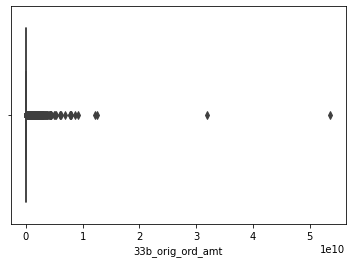

In [9]:
sns.boxplot(x=data["33b_orig_ord_amt"])

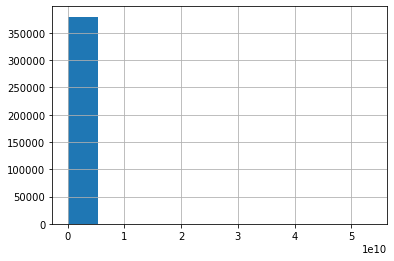

In [10]:
data["33b_orig_ord_amt"].hist()

In [11]:
# data['Bank_op_code'] = df['Bank_op_code']       #only 1 category there, CRED

In [13]:
conditions = [
    df['50f_payor_add_lon'] != "",
    df["50k_payor_add_lon"] != ""]
choices = [df["50f_payor_add_lon"], df["50k_payor_add_lon"]]
data['src_lon'] = np.select(conditions, choices, default=0)

In [14]:
conditions = [
    df["50f_payor_add_lat"] != "",
    df["50k_payor_add_lat"] != ""]
choices = [df["50f_payor_add_lat"], df["50k_payor_add_lat"]]
data["src_lat"] = np.select(conditions, choices, default=0)

In [15]:
data['src_lon'].isna().sum()

252689

In [16]:
data['src_lon'].fillna(data['src_lon'].mode()[0], inplace=True)

In [17]:
data["src_lat"].isna().sum()

252689

In [18]:
data['src_lat'].fillna(data['src_lat'].mode()[0], inplace=True)

In [19]:
data[["target_lat", "target_lon"]] = df.loc[:, ["59f_ben_add_lat", "59f_ben_add_lon"]]

In [20]:
data['target_lat'].isna().sum()

0

In [21]:
data['target_lat'].fillna(data['target_lat'].mode()[0], inplace=True)

In [22]:
data['target_lon'].isna().sum()

0

In [23]:
data['target_lon'].fillna(data['target_lon'].mode()[0], inplace=True)

In [24]:
data["charge_dtls"] = df.loc[:, "71A_chg_dtls"]

In [25]:
data["charge_dtls"].isna().sum()

0

In [26]:
data["charge_dtls"].value_counts()

SHA    126538
BEN    126506
OUR    126482
Name: charge_dtls, dtype: int64

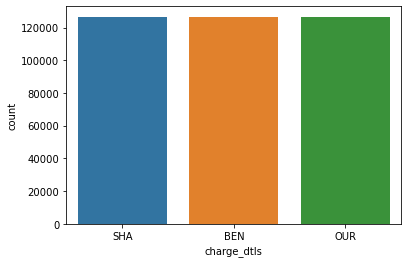

In [27]:
sns.countplot(x="charge_dtls", data=data)

In [28]:
data[["charge_dtls_cur", "charge_dtls_amt"]] = df.loc[:, ["71f_chg_dtls_cur", "71f_chg_dtls_amt"]]

In [29]:
data["charge_dtls_cur"].isnull().sum()*100/data["charge_dtls_cur"].shape[0]

66.66736929749213

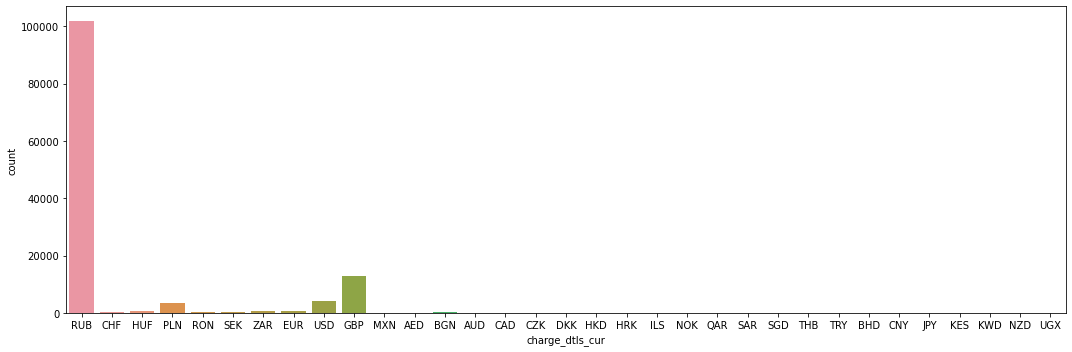

In [30]:
plt.figure(figsize = (15, 5))
sns.countplot(x="charge_dtls_cur", data=data)
plt.tight_layout()

In [31]:
data["charge_dtls_amt"].isnull().sum()*100/data["charge_dtls_amt"].shape[0]

66.66736929749213

In [32]:
data["charge_dtls_amt"].value_counts()

0.0    126506
Name: charge_dtls_amt, dtype: int64

In [33]:
data[data["charge_dtls"] == 'SHA']['charge_dtls_cur'].isna().sum()*100/data[data["charge_dtls"] == 'SHA'].shape[0]

100.0

In [34]:
data[data["charge_dtls"] == 'OUR']['charge_dtls_cur'].isna().sum()*100/data[data["charge_dtls"] == 'OUR'].shape[0]

100.0

In [35]:
data[data["charge_dtls"] == 'BEN']['charge_dtls_cur'].isna().sum()*100/data[data["charge_dtls"] == 'BEN'].shape[0]

0.0

In [36]:
data["charge_dtls_amt"].fillna(0.0, inplace=True)

In [37]:
data["charge_dtls_cur"].value_counts()

RUB    101854
GBP     13014
USD      4187
PLN      3508
HUF       787
EUR       740
ZAR       571
BGN       478
RON       263
SEK       199
CHF       167
TRY       120
ILS        76
MXN        71
DKK        63
AED        62
CZK        58
AUD        48
CAD        44
HKD        32
NOK        30
THB        24
HRK        21
SGD        21
UGX        16
NZD        16
JPY        13
SAR        11
QAR         5
CNY         4
KWD         1
KES         1
BHD         1
Name: charge_dtls_cur, dtype: int64

In [38]:
data["charge_dtls_cur"] = data["charge_dtls_cur"].replace(np.nan, "999", regex=True)

## Not Using Address

In [39]:
# conditions = [
#     df['50f_payor_add_ln_2'] != "",
#     df["50k_payor_add_ln_2"] != ""]
# choices = [df["50f_payor_add_ln_2"], df["50k_payor_add_ln_2"]]
# data['src_add2'] = np.select(conditions, choices, default=0)

In [40]:
# conditions = [
#     df['50f_payor_add_ln_1'] != "",
#     df["50k_payor_add_ln_1"] != ""]
# choices = [df["50f_payor_add_ln_1"], df["50k_payor_add_ln_1"]]
# data['src_add1'] = np.select(conditions, choices, default=0)

In [41]:
# data['dest_add1'] = df['59f_ben_add_ln_1']

In [42]:
# data['dest_add2'] = df['59f_ben_add_ln_2']

In [43]:
data.head()

,33b_cur,33b_orig_ord_amt,src_lon,src_lat,target_lat,target_lon,charge_dtls,charge_dtls_cur,charge_dtls_amt
0,RUB,1544103.68,-89.383761,43.074761,34.146942,-118.247847,SHA,999,0.0
1,RUB,912070.95,-89.383761,43.074761,47.566422,-99.650882,BEN,RUB,0.0
2,RUB,21760302.59,-89.383761,43.074761,42.795605,-110.929451,SHA,999,0.0
3,RUB,878587.53,-89.383761,43.074761,35.815612,-101.910435,SHA,999,0.0
4,RUB,6696355.97,-89.383761,43.074761,27.547259,-81.811471,SHA,999,0.0


In [44]:
# data["charge_dtls_cur"] = data["charge_dtls_cur"].replace(np.nan, "999", regex=True)
# data["charge_dtls_amt"] = data["charge_dtls_amt"].replace(np.nan, 0, regex=True)

# data["target_lat"] = data["target_lat"].replace(np.nan, 0, regex=True)
# data["target_lon"] = data["target_lon"].replace(np.nan, 0, regex=True)
# data["src_lon"] = data["src_lon"].replace(np.nan, 0, regex=True)
# data["src_lat"] = data["src_lat"].replace(np.nan, 0, regex=True)
# data["src_add2"] = data["src_add2"].replace(np.nan, "999", regex=True)
# data["src_add1"] = data["src_add1"].replace(np.nan, "999", regex=True)
# data["dest_add2"] = data["dest_add2"].replace(np.nan, "999", regex=True)
# data["dest_add1"] = data["dest_add1"].replace(np.nan, "999", regex=True)

In [45]:
data.isnull().sum()*100/data.shape[0]

33b_cur             0.0
33b_orig_ord_amt    0.0
src_lon             0.0
src_lat             0.0
target_lat          0.0
target_lon          0.0
charge_dtls         0.0
charge_dtls_cur     0.0
charge_dtls_amt     0.0
dtype: float64

In [46]:
data.columns

Index(['33b_cur', '33b_orig_ord_amt', 'src_lon', 'src_lat', 'target_lat',
       'target_lon', 'charge_dtls', 'charge_dtls_cur', 'charge_dtls_amt'],
      dtype='object')

In [47]:
data.shape

(379526, 9)

In [48]:
data['src_lon'].nunique()

10789

In [49]:
data['src_lat'].nunique()

10787

In [50]:
data['target_lat'].nunique()

10789

In [51]:
data['target_lon'].nunique()

10791

In [52]:
379526/10771

35.23591124315291

In [53]:
data['src_lat_bin'] = pd.cut(data['src_lat'], [-71, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 72], 
                              labels=['-71 -- -65', '-65 -- -60', '-60 -- -55', '-55 -- -50', '-50 -- -45', '-45 -- -40', '-40 -- -35', '-35 -- -30', '-30 -- -25', '-25 -- -20', '-20 -- -15', '-15 -- -10', '-10 -- -5', '-5 -- 0', '0 - 5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-72'])

In [54]:
data['target_lat_bin'] = pd.cut(data['target_lat'], [-71, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 72], 
                              labels=['-71 -- -65', '-65 -- -60', '-60 -- -55', '-55 -- -50', '-50 -- -45', '-45 -- -40', '-40 -- -35', '-35 -- -30', '-30 -- -25', '-25 -- -20', '-20 -- -15', '-15 -- -10', '-10 -- -5', '-5 -- 0', '0 - 5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-72'])

In [55]:
data['src_lon_bin'] = pd.cut(data['src_lon'], [-171, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 154], 
                              labels=['-171 -- -160', '-160 -- -150', '-150 -- -140', '-140 -- -130', '-130 -- -120', '-120 -- -110', '-110 -- -100', '-100 -- -90', '-90 -- -80', '-80 -- -70', '-70 -- -60', '-60 -- -50', '-50 -- -40', '-40 -- -30', '-30 -- -20', '-20 -- -10', '-10-0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-154'])

In [56]:
data['target_lon_bin'] = pd.cut(data['target_lon'], [-171, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 154], 
                              labels=['-171 -- -160', '-160 -- -150', '-150 -- -140', '-140 -- -130', '-130 -- -120', '-120 -- -110', '-110 -- -100', '-100 -- -90', '-90 -- -80', '-80 -- -70', '-70 -- -60', '-60 -- -50', '-50 -- -40', '-40 -- -30', '-30 -- -20', '-20 -- -10', '-10-0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-154'])

In [57]:
data[data['src_lat_bin'] == '40-45' ][['src_lat_bin', 'src_lat']].tail()

,src_lat_bin,src_lat
379519,40-45,43.074761
379521,40-45,43.074761
379522,40-45,40.808886
379524,40-45,43.074761
379525,40-45,43.074761


In [58]:
data[data['target_lat_bin'] == '-30 -- -25' ][['target_lat_bin', 'target_lat']].tail()

,target_lat_bin,target_lat
371126,-30 -- -25,-25.966213
372547,-30 -- -25,-25.745937
373383,-30 -- -25,-25.966213
377068,-30 -- -25,-25.429596
378289,-30 -- -25,-26.205000


In [59]:
data['src_lon_bin'].value_counts()

-90 -- -80      284291
-100 -- -90      36346
-80 -- -70       30603
-120 -- -110      8741
-110 -- -100      7600
-130 -- -120      7119
-70 -- -60        1485
-160 -- -150       531
-150 -- -140       246
110-120            242
70-80              242
30-40              224
10-20              220
120-130            196
0-10               145
40-50              138
-171 -- -160       131
-140 -- -130       126
20-30              125
-10-0              122
100-110            117
130-140             94
80-90               92
-50 -- -40          62
50-60               59
60-70               57
140-154             52
90-100              35
-60 -- -50          29
-40 -- -30          28
-20 -- -10          28
-30 -- -20           0
Name: src_lon_bin, dtype: int64

In [60]:
data['target_lon_bin'].value_counts()

-100 -- -90     107985
-90 -- -80       95134
-80 -- -70       91983
-120 -- -110     25430
-110 -- -100     22998
-130 -- -120     21802
-70 -- -60        4469
-160 -- -150      1589
-150 -- -140       712
110-120            665
70-80              657
30-40              633
120-130            627
10-20              619
0-10               424
-171 -- -160       413
-140 -- -130       374
100-110            370
-10-0              366
40-50              362
20-30              360
80-90              275
130-140            272
-50 -- -40         197
50-60              158
60-70              152
140-154            148
-60 -- -50         125
-40 -- -30          81
90-100              79
-20 -- -10          67
-30 -- -20           0
Name: target_lon_bin, dtype: int64

In [61]:
data.head()

,33b_cur,33b_orig_ord_amt,src_lon,src_lat,target_lat,target_lon,charge_dtls,charge_dtls_cur,charge_dtls_amt,src_lat_bin,target_lat_bin,src_lon_bin,target_lon_bin
0,RUB,1544103.68,-89.383761,43.074761,34.146942,-118.247847,SHA,999,0.0,40-45,30-35,-90 -- -80,-120 -- -110
1,RUB,912070.95,-89.383761,43.074761,47.566422,-99.650882,BEN,RUB,0.0,40-45,45-50,-90 -- -80,-100 -- -90
2,RUB,21760302.59,-89.383761,43.074761,42.795605,-110.929451,SHA,999,0.0,40-45,40-45,-90 -- -80,-120 -- -110
3,RUB,878587.53,-89.383761,43.074761,35.815612,-101.910435,SHA,999,0.0,40-45,35-40,-90 -- -80,-110 -- -100
4,RUB,6696355.97,-89.383761,43.074761,27.547259,-81.811471,SHA,999,0.0,40-45,25-30,-90 -- -80,-90 -- -80


In [62]:
data_cpy = data.copy()

In [63]:
data.columns

Index(['33b_cur', '33b_orig_ord_amt', 'src_lon', 'src_lat', 'target_lat',
       'target_lon', 'charge_dtls', 'charge_dtls_cur', 'charge_dtls_amt',
       'src_lat_bin', 'target_lat_bin', 'src_lon_bin', 'target_lon_bin'],
      dtype='object')

In [64]:
data_cpy = data_cpy[['33b_cur', 'charge_dtls', 'charge_dtls_cur', 'src_lat_bin', 'src_lon_bin', 'target_lat_bin', 'target_lon_bin']]

In [65]:
data_cpy

,33b_cur,charge_dtls,charge_dtls_cur,src_lat_bin,src_lon_bin,target_lat_bin,target_lon_bin
0,RUB,SHA,999,40-45,-90 -- -80,30-35,-120 -- -110
1,RUB,BEN,RUB,40-45,-90 -- -80,45-50,-100 -- -90
2,RUB,SHA,999,40-45,-90 -- -80,40-45,-120 -- -110
3,RUB,SHA,999,40-45,-90 -- -80,35-40,-110 -- -100
4,RUB,SHA,999,40-45,-90 -- -80,25-30,-90 -- -80
...,...,...,...,...,...,...,...
379521,USD,SHA,999,40-45,-90 -- -80,35-40,-130 -- -120
379522,USD,BEN,USD,40-45,-100 -- -90,35-40,-80 -- -70
379523,USD,OUR,999,35-40,-90 -- -80,35-40,-110 -- -100
379524,USD,SHA,999,40-45,-90 -- -80,40-45,-110 -- -100


In [66]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# data_cpy = data_cpy.apply(le.fit_transform)
# data_cpy.head()

In [67]:
# cost = []
# for num_clusters in range(1,20):
#     kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=0)
#     kmode.fit_predict(data_cpy)
#     cost.append(kmode.cost_)

In [68]:
# plt.figure(figsize=(15,5))
# y = np.array([i for i in range(1,20,1)])
# plt.plot(y,cost)

In [69]:
kmode = KModes(n_clusters=5, init = "Cao", n_init = 5, verbose=0)
clusters = kmode.fit_predict(data_cpy)

In [70]:
clusters

array([0, 1, 0, ..., 2, 0, 1], dtype=uint16)

In [71]:
clusterCentroids = pd.DataFrame(kmode.cluster_centroids_)
clusterCentroids.columns = data_cpy.columns

In [72]:
clusterCentroids

,33b_cur,charge_dtls,charge_dtls_cur,src_lat_bin,src_lon_bin,target_lat_bin,target_lon_bin
0,RUB,SHA,999,40-45,-90 -- -80,40-45,-100 -- -90
1,RUB,BEN,RUB,40-45,-90 -- -80,35-40,-90 -- -80
2,RUB,OUR,999,40-45,-90 -- -80,35-40,-80 -- -70
3,GBP,OUR,999,40-45,-90 -- -80,30-35,-90 -- -80
4,RUB,BEN,RUB,40-45,-90 -- -80,40-45,-80 -- -70


In [73]:
data.insert(0, "Clusters", clusters, True)

In [74]:
data.head()

,Clusters,33b_cur,33b_orig_ord_amt,src_lon,src_lat,target_lat,target_lon,charge_dtls,charge_dtls_cur,charge_dtls_amt,src_lat_bin,target_lat_bin,src_lon_bin,target_lon_bin
0,0,RUB,1544103.68,-89.383761,43.074761,34.146942,-118.247847,SHA,999,0.0,40-45,30-35,-90 -- -80,-120 -- -110
1,1,RUB,912070.95,-89.383761,43.074761,47.566422,-99.650882,BEN,RUB,0.0,40-45,45-50,-90 -- -80,-100 -- -90
2,0,RUB,21760302.59,-89.383761,43.074761,42.795605,-110.929451,SHA,999,0.0,40-45,40-45,-90 -- -80,-120 -- -110
3,0,RUB,878587.53,-89.383761,43.074761,35.815612,-101.910435,SHA,999,0.0,40-45,35-40,-90 -- -80,-110 -- -100
4,0,RUB,6696355.97,-89.383761,43.074761,27.547259,-81.811471,SHA,999,0.0,40-45,25-30,-90 -- -80,-90 -- -80


In [75]:
data['Clusters'].value_counts()

0    159141
1     81539
2     79282
4     38236
3     21328
Name: Clusters, dtype: int64

In [76]:
data[data['Clusters'] == 0]['33b_orig_ord_amt'].quantile(0.1)

6521.83

In [77]:
def quantile_values():
    clusters = data['Clusters'].nunique()
    for i in range(0,clusters):
        print(f"Cluster{i}: Centroid: {clusterCentroids.iloc[i]}")
        print(f"Cluster{i}: Transfer amount lower limit--    {data[data['Clusters'] == i]['33b_orig_ord_amt'].quantile(0.1)}")
        print(f"Cluster{i}: Transfer amount upper limit--    {data[data['Clusters'] == i]['33b_orig_ord_amt'].quantile(0.90)}")
        print(f"Cluster{i}: Source latitude lower limit--    {data[data['Clusters'] == i]['src_lat'].quantile(0.1)}")
        print(f"Cluster{i}: Source latitude upper limit--    {data[data['Clusters'] == i]['src_lat'].quantile(0.90)}")
        print(f"Cluster{i}: Source longitude lower limit--   {data[data['Clusters'] == i]['src_lon'].quantile(0.1)}")
        print(f"Cluster{i}: Source longitude upper limit--   {data[data['Clusters'] == i]['src_lon'].quantile(0.90)}")
        print(f"Cluster{i}: Destination latitude lower limit--  {data[data['Clusters'] == i]['target_lat'].quantile(0.1)}")
        print(f"Cluster{i}: Destination latitude upper limit--  {data[data['Clusters'] == i]['target_lat'].quantile(0.90)}")
        print(f"Cluster{i}: Destination longitude lower limit-- {data[data['Clusters'] == i]['target_lon'].quantile(0.1)}")
        print(f"Cluster{i}: Destination longitude upper limit-- {data[data['Clusters'] == i]['target_lon'].quantile(0.90)}")
        print("")

        

In [78]:
quantile_values()

Cluster0: Centroid: 33b_cur                    RUB
charge_dtls                SHA
charge_dtls_cur            999
src_lat_bin              40-45
src_lon_bin         -90 -- -80
target_lat_bin           40-45
target_lon_bin     -100 -- -90
Name: 0, dtype: object
Cluster0: Transfer amount lower limit--    6521.83
Cluster0: Transfer amount upper limit--    3120859.26
Cluster0: Source latitude lower limit--    36.8975794
Cluster0: Source latitude upper limit--    43.074760999999995
Cluster0: Source longitude lower limit--   -95.657771
Cluster0: Source longitude upper limit--   -81.36844090000001
Cluster0: Destination latitude lower limit--  31.469344800000002
Cluster0: Destination latitude upper limit--  44.9369054
Cluster0: Destination longitude lower limit-- -112.71682390000001
Cluster0: Destination longitude upper limit-- -73.70776213567353

Cluster1: Centroid: 33b_cur                   RUB
charge_dtls               BEN
charge_dtls_cur           RUB
src_lat_bin             40-45
src_lon_b

In [79]:
Rule_df = clusterCentroids.copy()

In [80]:
Rule_df['33b_orig_ord_amt_10'] = np.nan

In [81]:
Rule_df['33b_orig_ord_amt_90'] = np.nan

In [82]:
Rule_df['src_lat_10'] = np.nan

In [83]:
Rule_df['src_lat_90'] = np.nan

In [84]:
Rule_df['src_lon_10'] = np.nan

In [85]:
Rule_df['src_lon_90'] = np.nan

In [86]:
Rule_df['target_lat_10'] = np.nan

In [87]:
Rule_df['target_lat_90'] = np.nan

In [88]:
Rule_df['target_lon_10'] = np.nan

In [89]:
Rule_df['target_lon_90'] = np.nan

In [90]:
clusters = data['Clusters'].nunique()
for i in range(0,clusters):
    Rule_df.iloc[i,7] = data[data['Clusters'] == i]['33b_orig_ord_amt'].quantile(0.1)
    Rule_df.iloc[i,8] = data[data['Clusters'] == i]['33b_orig_ord_amt'].quantile(0.90)
    Rule_df.iloc[i,9] = data[data['Clusters'] == i]['src_lat'].quantile(0.1)
    Rule_df.iloc[i,10] = data[data['Clusters'] == i]['src_lat'].quantile(0.90)
    Rule_df.iloc[i,11] = data[data['Clusters'] == i]['src_lon'].quantile(0.1)
    Rule_df.iloc[i,12] = data[data['Clusters'] == i]['src_lon'].quantile(0.90)
    Rule_df.iloc[i,13] = data[data['Clusters'] == i]['target_lat'].quantile(0.1)
    Rule_df.iloc[i,14] = data[data['Clusters'] == i]['target_lat'].quantile(0.90)
    Rule_df.iloc[i,15] = data[data['Clusters'] == i]['target_lon'].quantile(0.1)
    Rule_df.iloc[i,16] = data[data['Clusters'] == i]['target_lon'].quantile(0.90)    

In [91]:
data.head(3)

,Clusters,33b_cur,33b_orig_ord_amt,src_lon,src_lat,target_lat,target_lon,charge_dtls,charge_dtls_cur,charge_dtls_amt,src_lat_bin,target_lat_bin,src_lon_bin,target_lon_bin
0,0,RUB,1544103.68,-89.383761,43.074761,34.146942,-118.247847,SHA,999,0.0,40-45,30-35,-90 -- -80,-120 -- -110
1,1,RUB,912070.95,-89.383761,43.074761,47.566422,-99.650882,BEN,RUB,0.0,40-45,45-50,-90 -- -80,-100 -- -90
2,0,RUB,21760302.59,-89.383761,43.074761,42.795605,-110.929451,SHA,999,0.0,40-45,40-45,-90 -- -80,-120 -- -110


In [94]:
Rule_df

,33b_cur,charge_dtls,charge_dtls_cur,src_lat_bin,src_lon_bin,target_lat_bin,target_lon_bin,33b_orig_ord_amt_10,33b_orig_ord_amt_90,src_lat_10,src_lat_90,src_lon_10,src_lon_90,target_lat_10,target_lat_90,target_lon_10,target_lon_90
0,RUB,SHA,999,40-45,-90 -- -80,40-45,-100 -- -90,6521.830,3120859.260,36.897579,43.074761,-95.657771,-81.368441,31.469345,44.936905,-112.716824,-73.707762
1,RUB,BEN,RUB,40-45,-90 -- -80,35-40,-90 -- -80,8300.480,3224560.360,37.083389,43.074761,-95.553320,-81.244050,30.632415,45.537318,-118.828431,-77.966305
2,RUB,OUR,999,40-45,-90 -- -80,35-40,-80 -- -70,8009.835,3237009.160,36.845595,43.074761,-95.713312,-81.361572,34.141942,43.657846,-118.788597,-72.163440
3,GBP,OUR,999,40-45,-90 -- -80,30-35,-90 -- -80,0.950,1024705.912,37.120921,43.074761,-95.460890,-81.422033,30.567753,42.511961,-111.963706,-81.391499
4,RUB,BEN,RUB,40-45,-90 -- -80,40-45,-80 -- -70,9983.475,3165680.680,36.815393,43.074761,-95.789318,-81.360938,40.349274,44.152297,-99.743923,-71.106164


In [95]:
Rule_df.to_csv('../workspace/data/rules_dataframe.csv', index=False)

In [139]:
def bins(df):
    df['src_lat_bin'] = pd.cut(df['src_lat'], [-71, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 72], 
                              labels=['-71 -- -65', '-65 -- -60', '-60 -- -55', '-55 -- -50', '-50 -- -45', '-45 -- -40', '-40 -- -35', '-35 -- -30', '-30 -- -25', '-25 -- -20', '-20 -- -15', '-15 -- -10', '-10 -- -5', '-5 -- 0', '0 - 5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-72'])
    
    df['src_lon_bin'] = pd.cut(df['src_lon'], [-171, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 154], 
                              labels=['-171 -- -160', '-160 -- -150', '-150 -- -140', '-140 -- -130', '-130 -- -120', '-120 -- -110', '-110 -- -100', '-100 -- -90', '-90 -- -80', '-80 -- -70', '-70 -- -60', '-60 -- -50', '-50 -- -40', '-40 -- -30', '-30 -- -20', '-20 -- -10', '-10-0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-154'])
    
    df['target_lat_bin'] = pd.cut(df['target_lat'], [-71, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 72], 
                              labels=['-71 -- -65', '-65 -- -60', '-60 -- -55', '-55 -- -50', '-50 -- -45', '-45 -- -40', '-40 -- -35', '-35 -- -30', '-30 -- -25', '-25 -- -20', '-20 -- -15', '-15 -- -10', '-10 -- -5', '-5 -- 0', '0 - 5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-72'])
    
    df['target_lon_bin'] = pd.cut(df['target_lon'], [-171, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 154], 
                              labels=['-171 -- -160', '-160 -- -150', '-150 -- -140', '-140 -- -130', '-130 -- -120', '-120 -- -110', '-110 -- -100', '-100 -- -90', '-90 -- -80', '-80 -- -70', '-70 -- -60', '-60 -- -50', '-50 -- -40', '-40 -- -30', '-30 -- -20', '-20 -- -10', '-10-0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-154'])
    
    return df



In [140]:
def apply_rules(df):
    df2 = pd.DataFrame(data=None, columns=df.columns)
    for _,row in df.iterrows():
        score=np.zeros(5, dtype=int)
        for i in range(0,5):
            if row['33b_cur'] == Rule_df.iloc[i,0]:
                score[i]+=1
            if row['charge_dtls'] == Rule_df.iloc[i,1]:
                score[i]+=1
            if row['charge_dtls_cur'] == Rule_df.iloc[i,2]:
                score[i]+=1
            if row['src_lat_bin'] == Rule_df.iloc[i,3]:
                score[i]+=1
            if row['src_lon_bin'] == Rule_df.iloc[i,4]:
                score[i]+=1
            if row['target_lat_bin'] == Rule_df.iloc[i,5]:
                score[i]+=1
            if row['target_lon_bin'] == Rule_df.iloc[i,6]:
                score[i]+=1
        
        cluster = score.argmax()
        
        if row['33b_orig_ord_amt'] >= Rule_df.iloc[cluster, 7] and row['33b_orig_ord_amt'] <= Rule_df.iloc[cluster, 8] \
        and row['src_lat'] >= Rule_df.iloc[cluster, 9] and row['src_lat'] <= Rule_df.iloc[cluster, 10] \
        and row['src_lon'] >= Rule_df.iloc[cluster, 11] and row['src_lon'] <= Rule_df.iloc[cluster, 12] \
        and row['target_lat'] >= Rule_df.iloc[cluster, 13] and row['target_lat'] <= Rule_df.iloc[cluster, 14] \
        and row['target_lon'] >= Rule_df.iloc[cluster, 15] and row['target_lon'] <= Rule_df.iloc[cluster, 16]:
            
            df2 = df2.append(row, ignore_index = True)
            
    
    return df2
            
             
df2 = apply_rules(temp)     

In [141]:
df2

,Clusters,33b_cur,33b_orig_ord_amt,src_lon,src_lat,target_lat,target_lon,charge_dtls,charge_dtls_cur,charge_dtls_amt,src_lat_bin,target_lat_bin,src_lon_bin,target_lon_bin
0,0,RUB,878587.53,-89.383761,43.074761,35.815612,-101.910435,SHA,999,0.0,40-45,35-40,-90 -- -80,-110 -- -100
1,0,RUB,251845.78,-89.383761,43.074761,41.238102,-85.853054,SHA,999,0.0,40-45,40-45,-90 -- -80,-90 -- -80
2,0,RUB,772391.88,-89.383761,43.074761,36.865050,-87.835295,SHA,999,0.0,40-45,35-40,-90 -- -80,-90 -- -80
3,0,RUB,274142.51,-89.383761,43.074761,38.273120,-98.582187,SHA,999,0.0,40-45,35-40,-90 -- -80,-100 -- -90
4,0,RUB,93648.45,-89.383761,43.074761,43.080545,-96.773655,SHA,999,0.0,40-45,40-45,-90 -- -80,-100 -- -90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,RUB,568693.51,-89.383761,43.074761,35.102576,-84.662436,BEN,RUB,0.0,40-45,35-40,-90 -- -80,-90 -- -80
419,0,RUB,1519085.25,-89.383761,43.074761,40.199300,-93.114099,SHA,999,0.0,40-45,40-45,-90 -- -80,-100 -- -90
420,4,RUB,135899.68,-89.383761,43.074761,42.000858,-92.198521,BEN,RUB,0.0,40-45,40-45,-90 -- -80,-100 -- -90
421,0,RUB,585397.98,-89.383761,43.074761,31.869631,-82.594303,SHA,999,0.0,40-45,30-35,-90 -- -80,-90 -- -80
